🔹 Sales Summary by Product:
| product   |   total_quantity |   total_revenue |
|:----------|-----------------:|----------------:|
| Apples    |               75 |           187.5 |
| Bananas   |              125 |           187.5 |
| Oranges   |              100 |           300   |


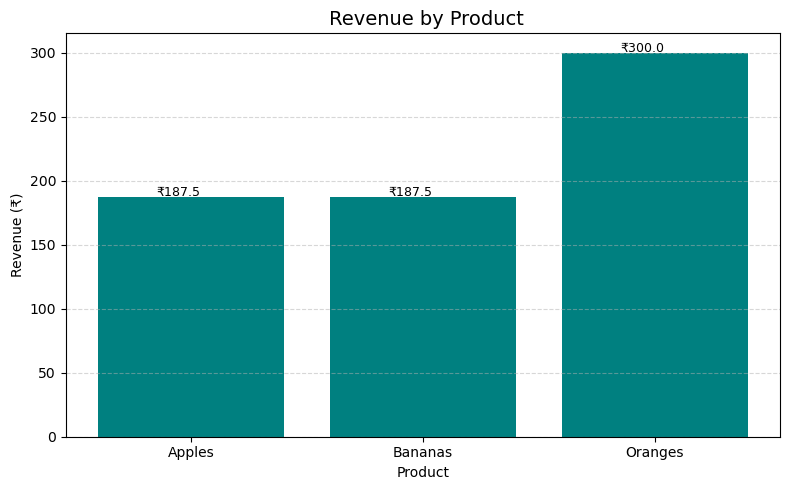

In [2]:
#  Task 7: Sales Summary using SQLite & Python
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------
#  1. Connect to SQLite DB
# -------------------------
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# -------------------------
#  2. Create 'sales' Table
# -------------------------
cursor.execute('''
    CREATE TABLE IF NOT EXISTS sales (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        product TEXT NOT NULL,
        quantity INTEGER NOT NULL,
        price REAL NOT NULL
    )
''')
conn.commit()

# -------------------------
#  3. Insert Sample Data
# -------------------------
sample_data = [
    ("Apples", 10, 2.5),
    ("Bananas", 15, 1.5),
    ("Oranges", 8, 3.0),
    ("Apples", 5, 2.5),
    ("Bananas", 10, 1.5),
    ("Oranges", 12, 3.0),
]

cursor.executemany(
    "INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)",
    sample_data
)
conn.commit()

# -------------------------
# 4. Run SQL Query
# -------------------------
query = '''
SELECT 
    product, 
    SUM(quantity) AS total_quantity, 
    ROUND(SUM(quantity * price), 2) AS total_revenue
FROM sales
GROUP BY product
'''
df = pd.read_sql_query(query, conn)
conn.close()

# -------------------------
#  5. Display the Summary
# -------------------------
print("🔹 Sales Summary by Product:")
print(df.to_markdown(index=False))  # prettier output

# -------------------------
#  6. Visualize with Bar Chart
# -------------------------
plt.figure(figsize=(8, 5))
bars = plt.bar(df['product'], df['total_revenue'], color='teal')
plt.title(" Revenue by Product", fontsize=14)
plt.xlabel("Product")
plt.ylabel("Revenue (₹)")
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Add value labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + 0.25, yval + 0.5, f"₹{yval}", fontsize=9)

plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()
